Asyncio with botocore
===

https://github.com/aio-libs/aiobotocore

In [4]:
import configparser


config = configparser.ConfigParser()
config.read_file(open('/Users/laisky/.aws/config'))

config.sections()

AWS_ACCESS_KEY_ID = config.get('profile laisky', 'AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = config.get('profile laisky', 'AWS_SECRET_ACCESS_KEY')

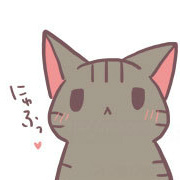

In [20]:
import asyncio
from io import BytesIO

import aiobotocore
from PIL import Image


async def main():
    bucket = 'laisky'
    key = 'head.jpg'
    
    session = aiobotocore.get_session(loop=loop)
    async with session.create_client('s3', region_name='us-west-2',
                                   aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
                                   aws_access_key_id=AWS_ACCESS_KEY_ID) as client:
        resp = await client.get_object(Bucket=bucket, Key=key)
        async with resp['Body'] as stream:
            bim = BytesIO(await stream.read())
            
    return Image.open(bim)



loop = asyncio.get_event_loop()
f = asyncio.ensure_future(main())
loop.run_until_complete(f)
f.result()